In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import requests
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import os
import selenium
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from bs4 import BeautifulSoup
import time

In [146]:

df = pd.read_csv('2024_10_25_17val44min_III_P_K_A_params.dat', delimiter=';')
df.head()

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t
0,[?],[?],[V],[mA/cm^2],[%],[V],[mA/cm^2],[mW/cm^2],[%],[cm^2],[min.]
1,P_III_REF_1k_10-25,FW,1.048,-14.83888,57.3896,0.736,-12.126249999999999,-8.9247,8.9247,0.08,-1.0
2,P_III_REF_1k_10-25,BW,1.048,-14.98405,59.5824,0.827,-11.31375,-9.3564,9.3564,0.08,-1.0
3,P_III_REF_2k_10-25,FW,0.996,-13.43314,61.5012,0.736,-11.18,-8.2285,8.2285,0.08,-1.0
4,P_III_REF_2k_10-25,BW,1.035,-13.8441,63.4651,0.775,-11.73375,-9.0937,9.0937,0.08,-1.0


In [147]:
df.columns = df.columns.str.replace(' ', '')
df = df.applymap(lambda x: x.strip())

first_row = df.iloc[0].tolist()
df=df.drop(index=0)
df['Uoc'] = df['Uoc'].astype(float)
df['jsc'] = df['jsc'].astype(float)
df['FF'] = df['FF'].astype(float)
df['Umax'] = df['Umax'].astype(float)
df['jmax'] = df['jmax'].astype(float)
df['Pmax'] = df['Pmax'].astype(float)
df['PCE'] = df['PCE'].astype(float)
df['S'] = df['S'].astype(float)
df['t'] = df['t'].astype(float)

df.head(50)

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t
1,P_III_REF_1k_10-25,FW,1.04800,-14.83888,57.3896,0.7360,-12.126250,-8.9247,8.9247,0.08,-1.0
2,P_III_REF_1k_10-25,BW,1.04800,-14.98405,59.5824,0.8270,-11.313750,-9.3564,9.3564,0.08,-1.0
3,P_III_REF_2k_10-25,FW,0.99600,-13.43314,61.5012,0.7360,-11.180000,-8.2285,8.2285,0.08,-1.0
4,P_III_REF_2k_10-25,BW,1.03500,-13.84410,63.4651,0.7750,-11.733750,-9.0937,9.0937,0.08,-1.0
5,P_III_REF_3k_10-25,FW,0.95700,-12.25571,59.4133,0.7230,-9.638750,-6.9684,6.9684,0.08,-1.0
6,P_III_REF_3k_10-25,BW,1.03500,-13.29566,63.2431,0.7620,-11.421250,-8.7029,8.7029,0.08,-1.0
7,P_III_REF_4k_10-25,FW,0.59300,-13.21983,32.7104,0.3330,-7.700000,-2.5643,2.5643,0.08,-1.0
8,P_III_REF_4k_10-25,BW,0.67100,-13.36829,31.7707,0.4110,-6.933750,-2.8499,2.8499,0.08,-1.0
9,P_III_REF_5k_10-25,FW,0.95700,-10.18585,58.1151,0.7100,-7.978750,-5.6650,5.6650,0.08,-1.0
10,P_III_REF_5k_10-25,BW,1.02200,-10.92538,63.9099,0.7750,-9.207500,-7.1360,7.1360,0.08,-1.0


In [169]:
REFdf = df[df['SC'].str.contains('REF')]
S3df = df[df['SC'].str.contains('A_III_V1547\\+3S')]
BCPdf = df[df['SC'].str.contains('3S\\+BCP|A_III_V1547\\+3S')]
PCBMdf = df[df['SC'].str.contains('PCBM')]

S3df.head(50)

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t
13,A_III_V1547+3S_1k_10-25,FW,0.567,-0.09536,21.7301,0.281,-0.04125,-0.0117,0.0117,0.08,-1.0
14,A_III_V1547+3S_1k_10-25,BW,0.528,-0.07641,17.9103,0.229,-0.03125,-0.0072,0.0072,0.08,-1.0
15,A_III_V1547+3S_2k_10-25,FW,0.554,-0.05169,16.8190,0.216,-0.02250,-0.0048,0.0048,0.08,-1.0
16,A_III_V1547+3S_3k_10-25,FW,0.528,-0.08875,18.5978,0.216,-0.04000,-0.0087,0.0087,0.08,-1.0
17,A_III_V1547+3S_4k_10-25,FW,0.190,-0.08167,31.5006,0.112,-0.04375,-0.0049,0.0049,0.08,-1.0


In [149]:
REFdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SC      12 non-null     object 
 1   F/B     12 non-null     object 
 2   Uoc     12 non-null     float64
 3   jsc     12 non-null     float64
 4   FF      12 non-null     float64
 5   Umax    12 non-null     float64
 6   jmax    12 non-null     float64
 7   Pmax    12 non-null     float64
 8   PCE     12 non-null     float64
 9   S       12 non-null     float64
 10  t       12 non-null     float64
dtypes: float64(9), object(2)
memory usage: 1.1+ KB


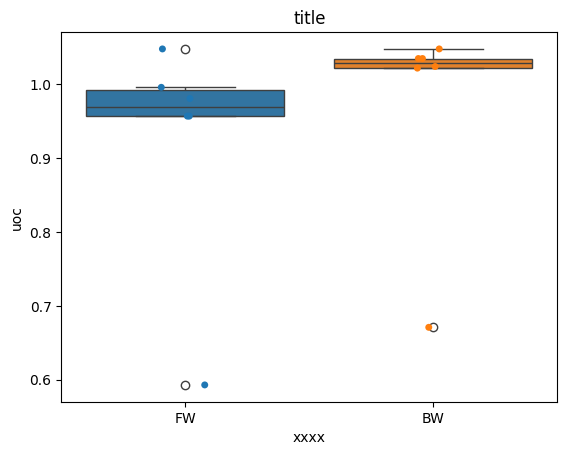

In [157]:

plt.figure()
sns.boxplot(x="F/B", y='Uoc',hue="F/B", data=REFdf)
sns.stripplot(x="F/B", y='Uoc', hue='F/B', data=REFdf)

plt.title("title")
plt.xlabel("xxxx")
plt.ylabel("uoc")
plt.show()

In [ ]:
plt.figure()
sns.boxplot(x="F/B", y='Uoc',hue="F/B", data=REFdf)
sns.stripplot(x="F/B", y='Uoc', hue='F/B', data=REFdf)

plt.title("title")
plt.xlabel("xxxx")
plt.ylabel("uoc")
plt.show()

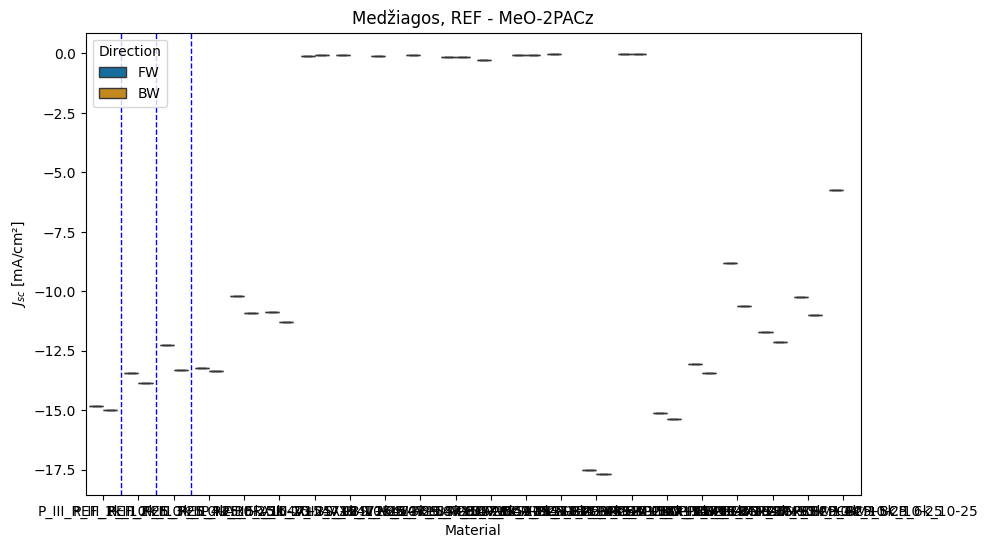

In [151]:
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x="SC", y="jsc", hue="F/B", data=df, palette="colorblind", showfliers=True, 
            flierprops=dict(marker='o', color='red', markersize=8))  # Customize outliers

# Add vertical lines to separate groups (as in your image)
plt.axvline(0.5, color='blue', linestyle='--', linewidth=1)
plt.axvline(1.5, color='blue', linestyle='--', linewidth=1)
plt.axvline(2.5, color='blue', linestyle='--', linewidth=1)

# Customize the plot
plt.title("Medžiagos, REF - MeO-2PACz")
plt.xlabel("Material")
plt.ylabel(r"$J_{sc}$ [mA/cm²]")
plt.legend(title="Direction", loc='upper left')

# Show plot
plt.show()